In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import helpers as h

In [2]:
h.mkdir('plots')

In [3]:
input = cv.imread('datasets/polyp/valid/input/594.png')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
label = cv.imread('datasets/polyp/valid/label/594.png')

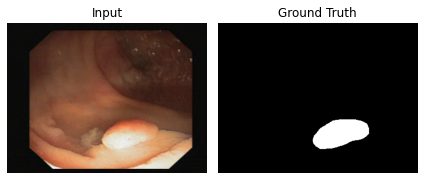

In [4]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/polyp_example.png', bbox_inches='tight')

In [5]:
input = np.load('datasets/liver/valid/volume-130-400.npy')
label = np.load('datasets/liver/valid/segmentation-130-400.npy')
label[label > 0] = 1

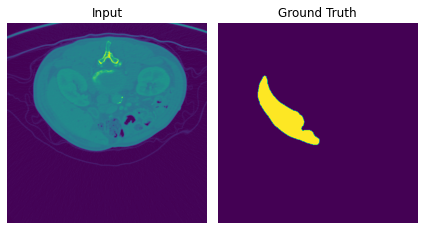

In [6]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/liver_example.png', bbox_inches='tight')

In [7]:
input = cv.imread('datasets/lesion/valid/input/ISIC_0036206.jpg')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
label = cv.imread('datasets/lesion/valid/label/ISIC_0036206.png')

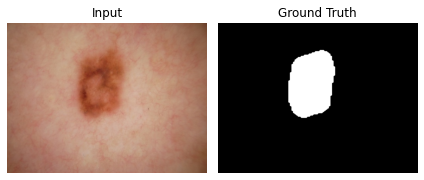

In [8]:
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input)
ax1.set_title('Input')
ax1.set_axis_off()
ax2.imshow(label)
ax2.set_axis_off()
ax2.set_title('Ground Truth')
plt.tight_layout()
plt.savefig('plots/lesion_example.png', bbox_inches='tight')

In [29]:
import polar_transformations as pt

center = pt.centroid(label)
label = label[:, :, 0] / 255
label_polar = pt.to_polar(label, center)
input_polar = pt.to_polar(input, center).astype(np.uint8)

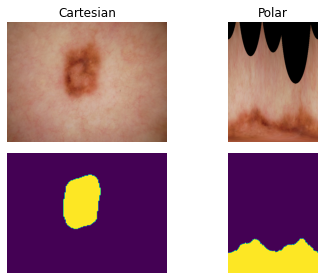

In [31]:
_, axes = plt.subplots(2, 2)
axes = axes.flatten()
images = [input, input_polar, label, label_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i])
    ax.set_axis_off()
    
plt.tight_layout()
plt.savefig('plots/to-polar.png', bbox_inches='tight')

In [48]:
image = np.zeros((255, 255, 3), np.uint8)
image = cv.circle(image, (255 // 2, 255 // 2), 255 // 4, (0, 0, 255), 2)
image = cv.circle(image, (255 // 2, 255 // 2), 3, (255, 0, 0), -1)
image_polar = pt.to_polar(image, (255 // 2, 255 // 2)).astype(np.uint8)

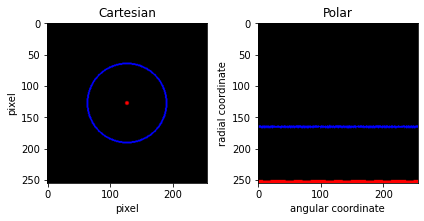

In [54]:
_, axes = plt.subplots(1, 2)
axes = axes.flatten()
images = [image, image_polar]

axes[0].set_title('Cartesian')
axes[1].set_title('Polar')

axes[0].set_ylabel('pixel')
axes[0].set_xlabel('pixel')


axes[1].set_ylabel('radial coordinate')
axes[1].set_xlabel('angular coordinate')
axes[1].set_ylim(axes[1].get_ylim()[::-1])

for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i])
    
plt.tight_layout()
plt.savefig('plots/polar-transform.png', bbox_inches='tight')